# 合成データセットのEDA

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [285]:
df = pd.read_csv("../graph_data/new_poisson/data_info.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

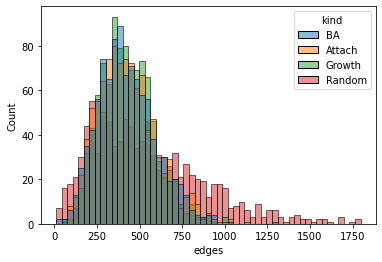

In [289]:
sns.histplot(data=df, x="edges", hue="kind")

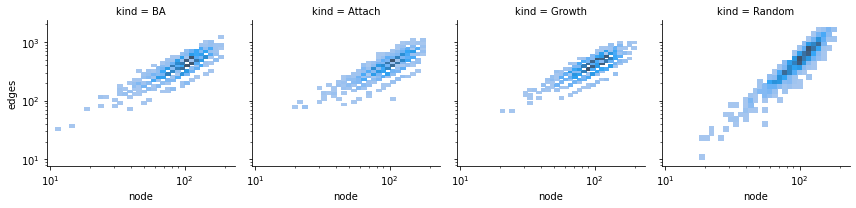

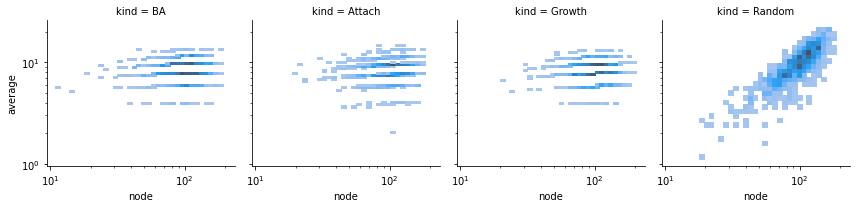

In [243]:
g = sns.FacetGrid(df.query("edges>0"), col="kind")
g.map(sns.histplot, "node", "edges", log_scale=(True,True))
plt.show()

g = sns.FacetGrid(df.query("edges>0"), col="kind")
g.map(sns.histplot, "node", "average", log_scale=(True,True))
plt.show()

In [ ]:
pip uninstall resea

# robustness data EDA

In [36]:
robustness_df = pd.read_csv("./robustness_plot/BA.csv")
for kind in ["Attach", "Growth", "Random"]:
    robustness_df = robustness_df.append(pd.read_csv(f"./robustness_plot/{kind}.csv"))

robustness_df.drop("Unnamed: 0", axis=1, inplace=True)
robustness_df.reset_index(inplace=True)

In [37]:
pred_df = pd.read_csv("./robustness_plot/CNN_subset1_50.csv")
pred_df.drop(["Unnamed: 0", "node", "parameter", "kind", "num"], axis=1, inplace=True)
pred_df.reset_index(inplace=True)

In [38]:
merge_df = pd.merge(robustness_df, pred_df,left_index=True, right_index=True)
merge_df.drop(["index_x","index_y"], axis=1, inplace=True)

In [22]:
merge_df

,average,edges,max_degree,min_degree,Skewness,Kurtosis,average_cluster,average_shortest_path,kind,parameter,node,param,true_label,pred,probablility
0,1.900,19.0,9.0,1.0,2.620914,6.266693,0.000000,2.747368,BA,1.0,20.0,NaN,0,0,1.000000
1,1.900,19.0,5.0,1.0,1.167640,-0.301870,0.000000,3.363158,BA,1.0,20.0,NaN,0,0,1.000000
2,1.900,19.0,13.0,1.0,3.758163,13.002530,0.000000,2.415789,BA,1.0,20.0,NaN,0,0,0.999993
3,1.900,19.0,6.0,1.0,1.604969,0.841087,0.000000,3.047368,BA,1.0,20.0,NaN,0,0,1.000000
4,1.900,19.0,7.0,1.0,2.074220,3.910185,0.000000,3.610526,BA,1.0,20.0,NaN,0,0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20295,399.906,399906.0,459.0,347.0,0.103130,-0.006832,0.200006,1.799947,Random,0.2,2000.0,NaN,3,3,1.000000
20296,399.483,399483.0,460.0,336.0,0.005913,-0.096902,0.199782,1.800159,Random,0.2,2000.0,NaN,3,3,1.000000
20297,398.799,398799.0,458.0,338.0,-0.069766,0.037134,0.199493,1.800501,Random,0.2,2000.0,NaN,3,3,1.000000
20298,398.379,398379.0,470.0,340.0,0.091161,0.097604,0.199282,1.800711,Random,0.2,2000.0,NaN,3,3,1.000000


In [219]:
merge_df["average_bins"] = [i.mid for i in pd.cut(merge_df.average, 200)]
merge_df["correct"] = merge_df["true_label"] == merge_df["pred"]

In [220]:
prob = merge_df["probablility"] > .7
correct = merge_df["true_label"] == merge_df["pred"]

In [221]:
correct_total = merge_df.groupby(["node", "average_bins"]).correct.count()
correct_sum = merge_df.groupby(["node", "average_bins"]).correct.sum()

In [222]:
df = pd.DataFrame(correct_sum / correct_total).reset_index()

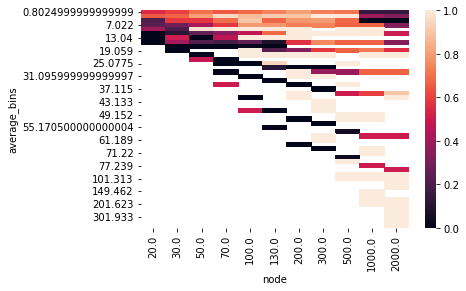

In [223]:
q_df = df.pivot_table(index="average_bins", columns= "node", values="correct")
sns.heatmap(q_df)

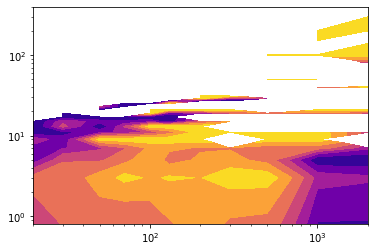

In [228]:
plt.contourf(q_df.columns, q_df.index, q_df.values, cmap="plasma")
plt.yscale("log")
plt.xscale("log")

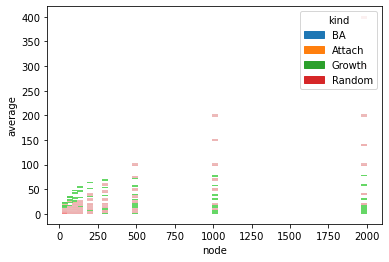

In [230]:
sns.histplot(data=merge_df, x="node", y="average", hue="kind")

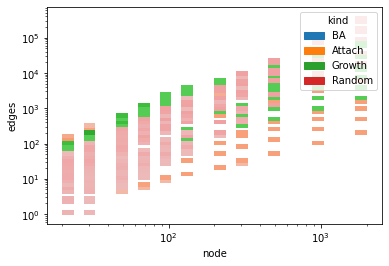

In [41]:
sns.histplot(data=merge_df.query("edges > 0"), x="node", y="edges", hue="kind", log_scale=(True,True))

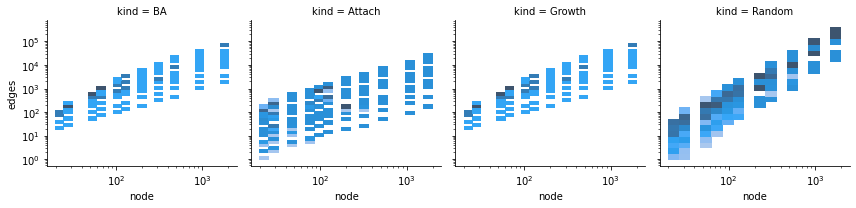

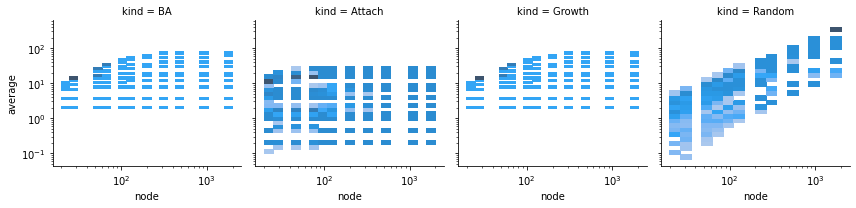

In [39]:
g = sns.FacetGrid(merge_df.query("edges>0"), col="kind")
g.map(sns.histplot, "node", "edges", log_scale=(True,True))
plt.show()

g = sns.FacetGrid(merge_df.query("edges>0"), col="kind")
g.map(sns.histplot, "node", "average", log_scale=(True,True))
plt.show()

In [2]:
import networkx as nx
from reserch_utils_HT import no_growth, no_preferential_attachment
from tqdm import tqdm

In [4]:
%%time
no_growth(2000, 2000 * 25)

CPU times: user 19.1 s, sys: 252 ms, total: 19.3 s
Wall time: 19.3 s


In [ ]:
"Random": {
        20: np.linspace(0.03, 0.25, 10),
        30: np.linspace(0.03, 0.25, 10),
        50: np.linspace(0.03, 0.25, 10),
        70: np.linspace(0.03, 0.25, 10),
        100: np.linspace(0.01, 0.2, 14),
        200: np.linspace(0.01, 0.2, 14),
        300: np.linspace(0.01, 0.2, 14),
        500: np.linspace(0.01, 0.2, 14),
        1000: np.logspace(-3.3, -1.3, 17),
        2000: np.logspace(-3.3, -1.3, 17)
        
    }

In [113]:
node_list = [20,30,50,70,100,200,300,500,1000,2000]
def net_info(G):
    """ ノード数, エッジ数, 平均次数 """
    degs = list(dict(G.degree).values())
    info = {"node": nx.number_of_nodes(G),
            "edges": nx.number_of_edges(G),
            "average": np.average(degs)
           }
    return info

def attach_params(n):
    return [n*.25,n*.5,n*.75,n,n*2,n*3,n*4,n*8,n*10,n*15,n*20]

basic = [0.05, 0.07, 0.1, 0.15, 0.2]

parameter = {
    "BA": {
        20 : [1,2,3,4,5,6,7,8,9,10],
        30 : [1,2,3,4,5,6,7,8,9,10],
        50 : [1,2,3,4,5,6,7,8,9,10],
        70 : [1,2,3,4,5,6,7,8,9,10],
        100: [1,2,3,4,5,6,7,8,9,10,15,20,25,30],
        200: [1,2,3,4,5,6,7,8,9,10,15,20,25,30],
        300: [1,2,3,4,5,6,7,8,9,10,15,20,25,30],
        500: [1,2,3,4,5,6,7,8,9,10,15,20,25,30],
        1000: [1,2,3,4,5,6,7,8,9,10,15,20,25,30,50,100,200],
        2000: [1,2,3,4,5,6,7,8,9,10,15,20,25,30,50,100,200]
    },
    "Attach":{
        20 : [20 * i for i in np.linspace(0.5, 25, 10)],
        30 : [30 * i for i in np.linspace(0.5, 25, 10)],
        50 : [50 * i for i in np.linspace(0.5, 25, 10)],
        70 : [70 * i for i in np.linspace(0.5, 25, 10)],
        
        100 : [100 * i for i in np.linspace(0.5, 25, 14)],
        200 : [200 * i for i in np.linspace(0.5, 25, 14)],
        300 : [300 * i for i in np.linspace(0.5, 25, 14)],
        500 : [500 * i for i in np.linspace(0.5, 25, 14)],
        
        1000 : [1000 * i for i in np.linspace(0.5, 25, 17)],
        2000 : [2000 * i for i in np.linspace(0.5, 25, 17)],
        
    },
    "Random": {
        20: np.logspace(-1.3, -0.1, 10),
        30: np.logspace(-1.3, -0.1, 10),
        50: np.logspace(-1.3, -0.1, 10),
        70: np.logspace(-1.3, -0.1, 10),
        100: np.logspace(-2, -0.7, 14),
        200: np.logspace(-2, -0.7, 14),
        300: np.logspace(-2, -0.7, 14),
        500: np.logspace(-2, -0.7, 14),
        1000: np.logspace(-3., -0.9, 17),
        2000: np.logspace(-3., -0.9, 17)
    }
}

In [20]:
df = pd.DataFrame()
cnt = 0
for node in tqdm(node_list):
    for p in parameter["BA"][node]:
        for _ in range(10):
            G = nx.barabasi_albert_graph(node, p)
#             G = no_growth(node, p)
            df = df.append(pd.Series(net_info(G), name=cnt))
            cnt+=1


100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


In [114]:
df_attach = pd.DataFrame()
cnt = 0
for node in tqdm(node_list):
    for p in parameter["Attach"][node]:
        for _ in range(10):
            G = no_growth(node, int(p))
            df_attach = df_attach.append(pd.Series(net_info(G), name=cnt))
            cnt+=1

100%|██████████| 10/10 [38:09<00:00, 228.96s/it]


In [109]:
df_random = pd.DataFrame()
cnt = 0
for node in tqdm(node_list):
    for p in parameter["Random"][node]:
        for _ in range(10):
            G = nx.gnp_random_graph(node, p)
            df_random = df_random.append(pd.Series(net_info(G), name=cnt))
            cnt+=1

100%|██████████| 10/10 [00:56<00:00,  5.68s/it]


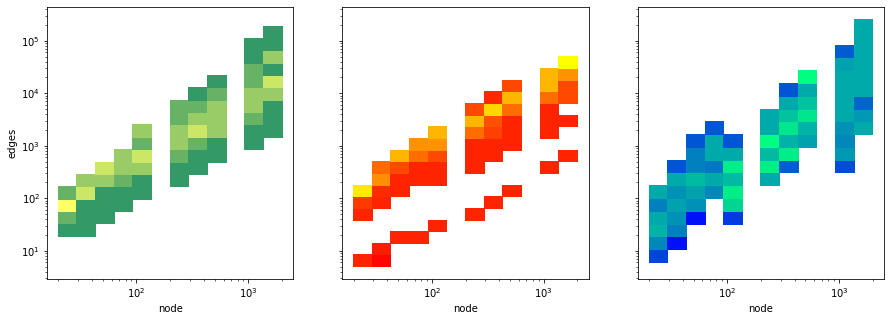

In [115]:
fig, axes = plt.subplots(1,3,figsize=(15,5), sharey=True, sharex=True)
sns.histplot(data=df, x="node", y="edges", log_scale=(True, True), label="BA", cmap="summer", ax=axes[0])
sns.histplot(data=df_attach, x="node", y="edges", log_scale=(True, True), label="Attach", cmap="autumn",ax=axes[1])
sns.histplot(data=df_random, x="node", y="edges", log_scale=(True, True), label="Random",cmap="winter", ax=axes[2])

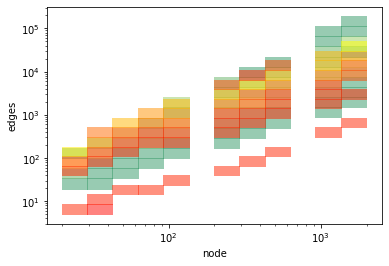

In [119]:
sns.histplot(data=df, x="node", y="edges", log_scale=(True, True), label="BA", cmap="summer", alpha=.5)
sns.histplot(data=df_attach, x="node", y="edges", log_scale=(True, True), label="Attach", cmap="autumn",alpha=.5)
# sns.histplot(data=df_random, x="node", y="edges", log_scale=(True, True), label="Random",cmap="winter",alpha=.2)

In [23]:
df_attach = pd.DataFrame()
cnt = 0
for node in tqdm(node_list):
    for p in parameter["Attach"][node]:
        for _ in range(10):
            G = no_growth(node, int(p))
            df_attach = df_attach.append(pd.Series(net_info(G), name=cnt))
            cnt+=1

100%|██████████| 10/10 [11:49<00:00, 70.93s/it] 


In [103]:
df_random = pd.DataFrame()
cnt = 0
for node in tqdm(node_list):
    for p in parameter["Random"][node]:
        for _ in range(10):
            G = nx.gnp_random_graph(node, p)
            df_random = df_random.append(pd.Series(net_info(G), name=cnt))
            cnt+=1

100%|██████████| 10/10 [00:51<00:00,  5.19s/it]


In [51]:
node_list

[20, 30, 50, 70, 100, 200, 300, 500, 1000, 2000]

In [2]:
df = pd.read_csv("./robustness_plot/robustness_info.csv")

In [3]:
df.head()

,Unnamed: 0,node,edges,average,kind,parameter,seed
0,0,20.0,19.0,1.9,BA,1.0,10000.0
1,1,20.0,19.0,1.9,BA,1.0,10001.0
2,2,20.0,19.0,1.9,BA,1.0,10002.0
3,3,20.0,19.0,1.9,BA,1.0,10003.0
4,4,20.0,19.0,1.9,BA,1.0,10004.0
